In [2]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

import mod.funs as fu

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
p = '../../data/data_orig/J7_25_1996_2022_10min.txt'

In [4]:
d1 = (
    pd.read_csv(p,names =['time_ml','j725','dN_dt','CS','GR','N'])
    .assign(time=lambda d:pd.to_datetime(d['time_ml'] - 719529, unit='D').round('10T'))
    .set_index('time')
    ['2018-01-01':]
)

In [5]:
d2 = (
    d1
    .assign(hour = lambda d:d.index.hour)
    .drop('time_ml',axis=1)
    .pipe(lambda d:d[~d.index.duplicated()])
    .resample('10T').median()
    .resample('15T').median()
    .assign(s=lambda d:d.to_xarray()['time'].dt.season.to_series())
)


In [6]:
d3 = fu.unstack_day(d2.to_xarray())

In [7]:
d3.to_netcdf('../../data/d1/j725.nc')

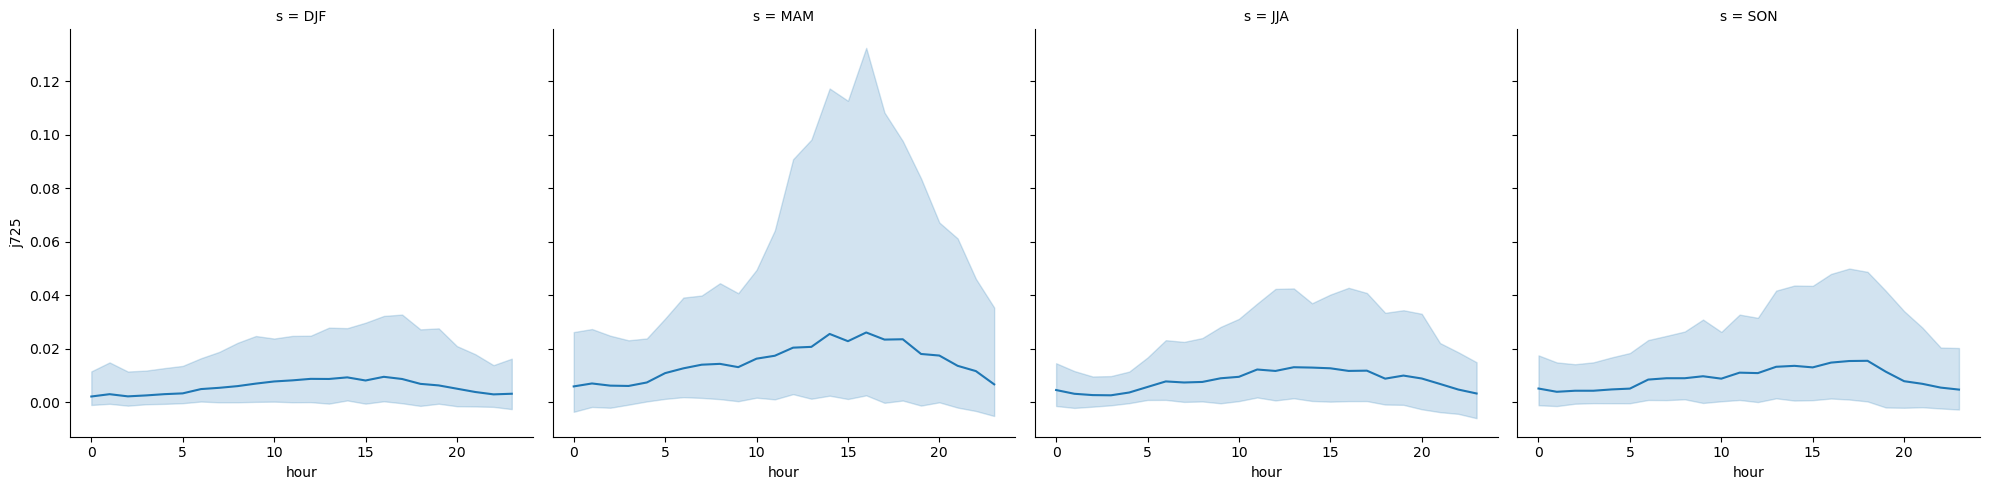

In [9]:
sns.relplot(
    data =d2,
    y='j725',
    x='hour',
    kind = 'line',
    estimator='median',
    errorbar=('pi', 50),
    col='s'
)